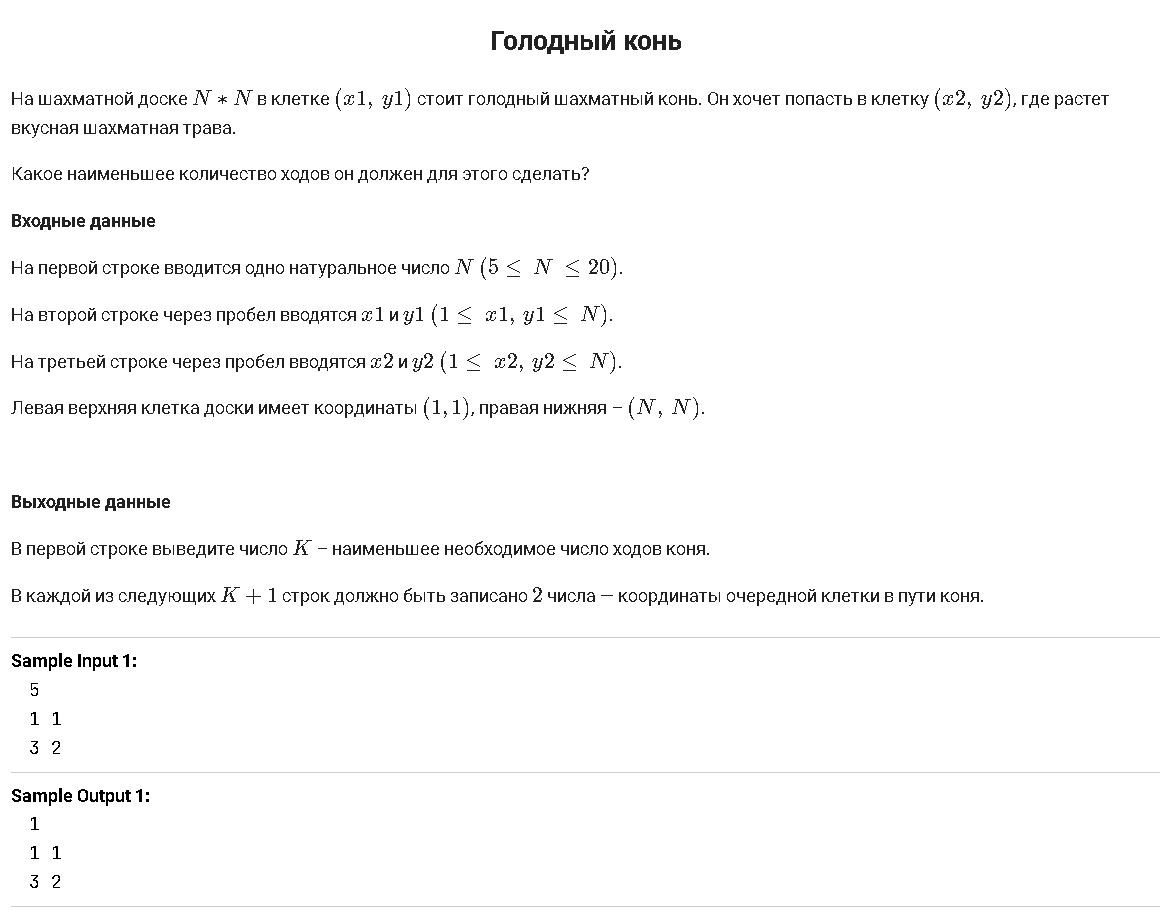

In [75]:
filename = "./hungry_horse_input_3.txt"

with open(filename, encoding="utf-8") as src:
    n = int(src.readline())
    x1, y1 = map(int, src.readline().split())
    x2, y2 = map(int, src.readline().split())

class Cell:
    def __init__(self, available, x, y):
        self.available = available
        self.n_moves = None
        self.prev_x = None
        self.prev_y = None
        self.x = x
        self.y = y

    def __repr__(self):
        return str(self.available)

pole = [[Cell(1, x, y) if 1 < x < n+2 and 1 < y < n+2 else 
         Cell(0, x, y) for y in range(n+4)] for x in range(n+4)]

dx = [-2, -2, 2, 2, -1, 1, -1, 1]
dy = [-1, 1, -1, 1, -2, -2, 2, 2]

start = pole[x1+1][y1+1]
start.n_moves = 0
queue = [start]
while queue:
    curr_cell = queue.pop(0)
    for i in range(len(dx)):
        neigh_cell = pole[curr_cell.x + dx[i]][curr_cell.y + dy[i]]
        if neigh_cell.available and neigh_cell.n_moves is None:
            neigh_cell.n_moves = curr_cell.n_moves + 1
            neigh_cell.prev_x = curr_cell.x
            neigh_cell.prev_y = curr_cell.y
            queue.append(neigh_cell)

cell = pole[x2+1][y2+1]
print(cell.n_moves)

path = []
path = [[cell.x-1, cell.y-1]]
while not cell.prev_x is None:
    path.append([cell.prev_x-1, cell.prev_y-1])
    cell = pole[cell.prev_x][cell.prev_y]
    
for step in path[::-1]:
    print(*step)

4
3 3
1 2
3 1
4 3
5 1
